# 6-Mobile phone data processing

In this example, we will introduce how to use the TransBigData to process mobile phone data.  
Firstly, import the TransBigData and read the data using pandas

In [1]:
import pandas as pd
import transbigdata as tbd

data = pd.read_csv(r'data/mobiledata_sample.csv')
#make sure the time column is correct
data['stime'] = pd.to_datetime(data['stime'], format='%Y%m%d%H%M')
data = data.sort_values(by = ['user_id','stime'])
data.head()

,user_id,stime,longitude,latitude,date
78668,00466ab30de56db7efbd04991b680ae1,2018-06-01 00:00:00,121.43,30.175,20180601
78669,00466ab30de56db7efbd04991b680ae1,2018-06-01 03:35:00,121.43,30.175,20180601
78670,00466ab30de56db7efbd04991b680ae1,2018-06-01 04:25:00,121.43,30.175,20180601
78671,00466ab30de56db7efbd04991b680ae1,2018-06-01 05:15:00,121.43,30.175,20180601
78289,00466ab30de56db7efbd04991b680ae1,2018-06-01 06:05:00,121.43,30.175,20180601


## Identify stay and move infomation from mobile phone trajectory data

When processing mobile phone data, TransBigData's approach is to first correspond the data to the grids and treat the data within the same grid as being at the same location to avoid data positioning errors that cause the same location to be identified as multiple.

In [2]:
#Obtain gridding parameters
params = tbd.area_to_params([121.860, 29.295, 121.862, 29.301], accuracy=500)
#Identify stay and move infomation from mobile phone trajectory data
stay,move = tbd.mobile_stay_move(data,params,col = ['user_id','stime','longitude', 'latitude'])

In [3]:
stay.head()

,user_id,stime,LONCOL,LATCOL,etime,lon,lat,duration
0,00466ab30de56db7efbd04991b680ae1,2018-06-01 00:00:00,-83,196,2018-06-01 07:21:00,121.432040,30.176335,26460.0
1,00466ab30de56db7efbd04991b680ae1,2018-06-01 07:36:00,-81,191,2018-06-01 12:02:00,121.442352,30.153852,15960.0
2,00466ab30de56db7efbd04991b680ae1,2018-06-01 12:20:00,-83,196,2018-06-01 13:04:00,121.432040,30.176335,2640.0
3,00466ab30de56db7efbd04991b680ae1,2018-06-01 14:34:00,-60,189,2018-06-01 23:12:00,121.550631,30.144858,31080.0
4,00466ab30de56db7efbd04991b680ae1,2018-06-02 00:02:00,-83,196,2018-06-02 09:36:00,121.432040,30.176335,34440.0


In [4]:
move.head()

,user_id,SLONCOL,SLATCOL,stime,slon,slat,etime,elon,elat,ELONCOL,ELATCOL,duration
0,00466ab30de56db7efbd04991b680ae1,-83,196,2018-06-01 07:21:00,121.432040,30.176335,2018-06-01 07:36:00,121.442352,30.153852,-81.0,191.0,900.0
1,00466ab30de56db7efbd04991b680ae1,-81,191,2018-06-01 12:02:00,121.442352,30.153852,2018-06-01 12:20:00,121.432040,30.176335,-83.0,196.0,1080.0
2,00466ab30de56db7efbd04991b680ae1,-83,196,2018-06-01 13:04:00,121.432040,30.176335,2018-06-01 14:34:00,121.550631,30.144858,-60.0,189.0,5400.0
3,00466ab30de56db7efbd04991b680ae1,-60,189,2018-06-01 23:12:00,121.550631,30.144858,2018-06-02 00:02:00,121.432040,30.176335,-83.0,196.0,3000.0
4,00466ab30de56db7efbd04991b680ae1,-83,196,2018-06-02 09:36:00,121.432040,30.176335,2018-06-02 10:56:00,121.406259,30.176335,-88.0,196.0,4800.0


## Home and work place identify

In [5]:
#Identify home location
home = tbd.mobile_identify_home(stay, col=['user_id','stime', 'etime','LONCOL', 'LATCOL','lon','lat'], start_hour=8, end_hour=20 )
home.head()

,user_id,LONCOL,LATCOL,lon,lat
1781,fcc3a9e9df361667e00ee5c16cb08922,-147,292,121.102046,30.608009
1769,f71e9d7d78e6f5bc9539d141e3a5a1c4,-216,330,120.746272,30.778880
1752,f6b65495b63574c2eb73c7e63ae38252,-225,-286,120.699867,28.008971
1739,f1f4224a60da630a0b83b3a231022123,102,157,122.385927,30.000967
1700,e96739aedb70a8e5c4efe4c488934b43,-223,278,120.710179,30.545056


In [6]:
#Identify work location
work = tbd.mobile_identify_work(stay, col=['user_id', 'stime', 'etime', 'LONCOL', 'LATCOL','lon','lat'], minhour=3, start_hour=8, end_hour=20,workdaystart=0, workdayend=4)
work.head()

,user_id,LONCOL,LATCOL,lon,lat
0,fcc3a9e9df361667e00ee5c16cb08922,-146,292,121.107203,30.608009
1,f71e9d7d78e6f5bc9539d141e3a5a1c4,-219,325,120.730804,30.756397
2,f6b65495b63574c2eb73c7e63ae38252,-225,-286,120.699867,28.008971
3,f1f4224a60da630a0b83b3a231022123,103,153,122.391083,29.982981
5,e1a1dfb5a77578c889bd3368ffe1d30f,-62,138,121.540319,29.915532


In [7]:
# If you want to filter out the users with work place location from home location 
home['flag'] = 1
work = pd.merge(work,home,how='left')
home = home.drop(['flag'],axis = 1)
work = work[work['flag'].isnull()].drop(['flag'],axis = 1)

## Plot activity

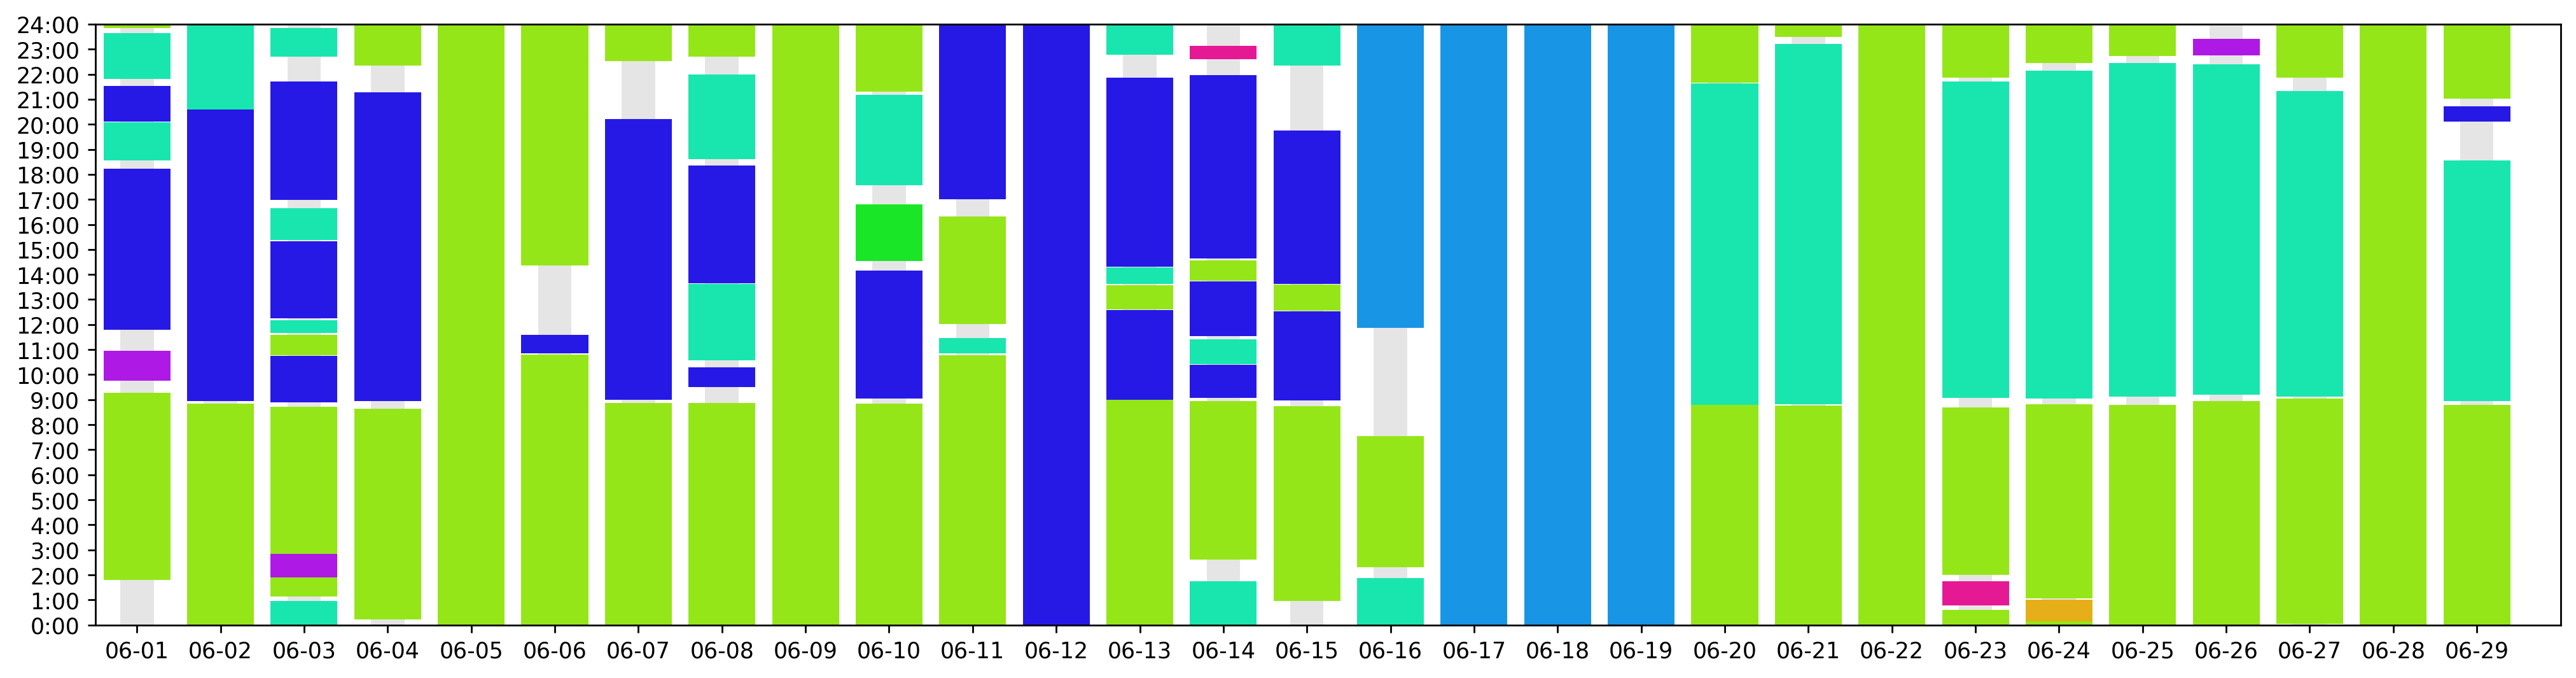

In [8]:
#Plot the activity of the user, different color represent different location
uid = 'fcc3a9e9df361667e00ee5c16cb08922'
stay['group'] = stay['LONCOL'].astype(str)+','+stay['LATCOL'].astype(str)
tbd.plot_activity(stay[stay['user_id']==uid],figsize = (20, 5))